In [66]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, YearLocator
import seaborn as sns

We will be looking at the data and the index curve along with how the prices are affected by the sentiment scores.

In [67]:
# load merged dataset
merged = pd.read_csv("merged_datasets.csv")

# display dataframe
display(merged)

,Date,Price,Open,High,Low,Change %,Score 1,Score 2,Score 3,Score 4,Score 5,Average Score
0,2016-07-01,"2,102.95","2,099.34","2,108.71","2,097.90",0.19%,0.219861,0.477043,0.794071,0.063050,0.352774,0.381360
1,2016-06-30,"2,098.86","2,073.17","2,098.94","2,070.00",1.36%,0.503280,0.292724,0.707632,0.049016,0.191895,0.348909
2,2016-06-29,"2,070.77","2,042.69","2,073.13","2,042.69",1.70%,0.503280,0.157116,0.899019,0.256470,0.279351,0.419047
3,2016-06-28,"2,036.09","2,006.67","2,036.09","2,006.67",1.78%,0.926120,0.269995,0.754411,0.665073,0.110896,0.545299
4,2016-06-27,"2,000.54","2,031.45","2,031.45","1,991.68",-1.81%,0.388214,0.642193,0.179438,0.451060,0.827122,0.497605
...,...,...,...,...,...,...,...,...,...,...,...,...
2027,2008-06-13,"1,360.03","1,341.81","1,360.03","1,341.71",1.50%,0.477043,0.058372,0.568363,0.133676,0.503280,0.348147
2028,2008-06-12,"1,339.87","1,335.78","1,353.03","1,331.29",0.33%,0.092744,0.252148,0.769360,0.107541,0.260894,0.296537
2029,2008-06-11,"1,335.49","1,357.09","1,357.09","1,335.47",-1.69%,0.341486,0.143438,0.309147,0.341486,0.503280,0.327767
2030,2008-06-10,"1,358.44","1,358.98","1,366.84","1,351.56",-0.24%,0.376163,0.198505,0.503280,0.503280,0.412824,0.398810


In [68]:
# make date pandas datetime
merged['Date'] = pd.to_datetime(merged['Date'])

# Sort the DataFrame by the 'Date' column
merged.sort_values('Date', inplace=True)

# Set 'Date' column as index
merged.set_index('Date', inplace=True)

# Convert 'Price' column to numeric (remove commas and convert to float)
merged['Price'] = merged['Price'].str.replace(',', '').astype(float)

# Convert 'Open' column to numeric (remove commas and convert to float)
merged['Open'] = merged['Open'].str.replace(',', '').astype(float)

# Convert 'Low' column to numeric (remove commas and convert to float)
merged['Low'] = merged['Low'].str.replace(',', '').astype(float)

# Convert 'High' column to numeric (remove commas and convert to float)
merged['High'] = merged['High'].str.replace(',', '').astype(float)

# Convert change % to a float
merged['Change %'] = merged['Change %'].str.replace('%','').astype(float)

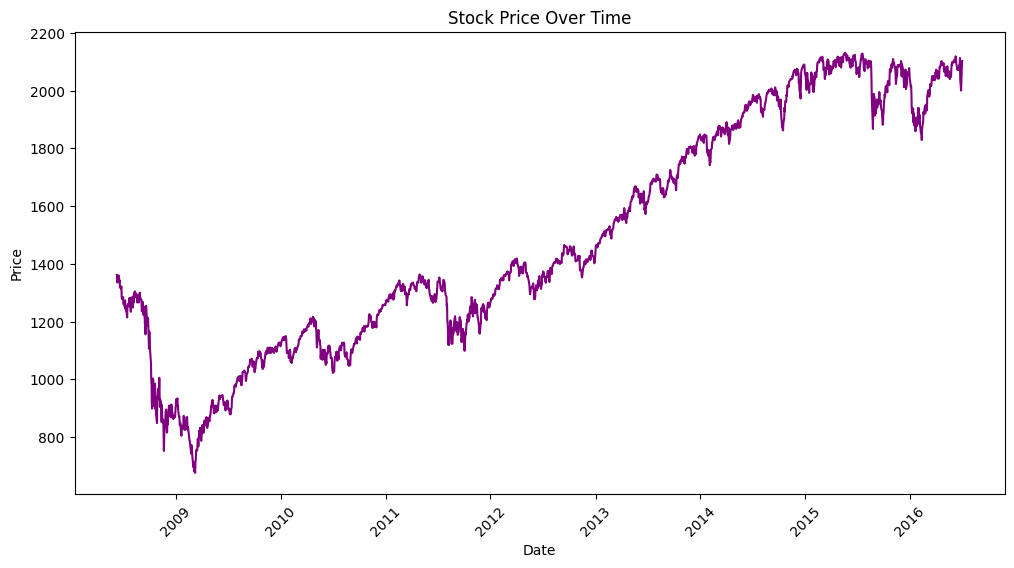

In [69]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.plot(merged.index.values,
       merged['Price'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Price",
       title="Stock Price Over Time")

# Set x-axis ticks to show only the years
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Define the date format
plt.xticks(rotation=45)

plt.show()

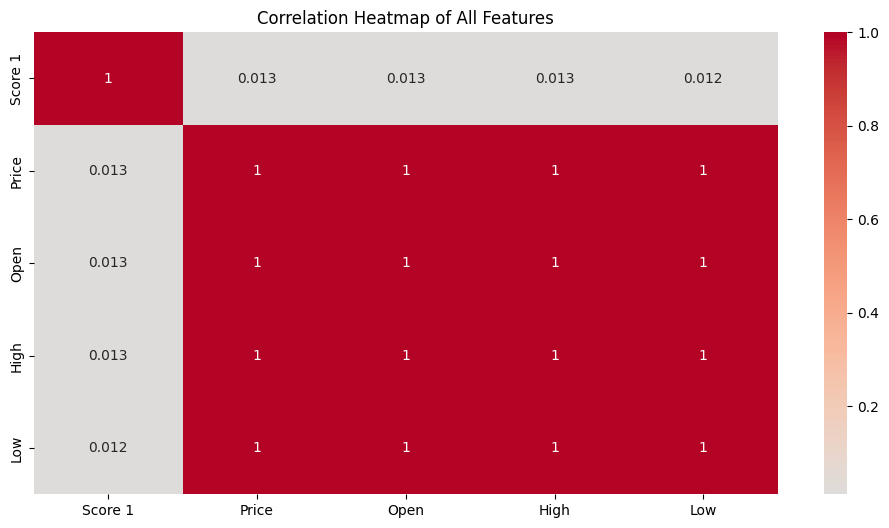

In [77]:
# creating heatmap
avg_score_prices = merged.loc[:,["Score 1", "Price", "Open", "High", "Low"]]

# Creating a correlation matrix
correlation_matrix = avg_score_prices.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of All Features')
plt.show()